# Chapter 12: Network models

<img src="NM_fig_01.png" alt="title" width="600px" />

## Motivation

**Graphs**: they are a way to model connections and connectivity.

Directed graphs: for *symmetric*, *reciprocal* relations.

Undirected graphs: for *asymmetric*, *non-reciprocal*  relations.



### Society

- Friendship between individuals (reciprocal)
- Kinship (reciprocal)
- Parenthood (non-reciprocal)
- Hierachical organization in a human society (non-reciprocal)
- Membership in an organization (reciprocal)

### Social networks
- Friendship on a social network platform (reciprocal)
- Followers-relations on a social network platform (non-reciprocal)

### Transport and distribution networks
- Topology of a power distribution network (non-reciprocal)
- Railway connection systems (reciprocal)
- Viability structure for cars in a city (non-reciprocal: one-way routes) 
- Connectivity via internet (reciprocal)

### Biology
- Metabolic processes (non-reciprocal)
- Hierachical structure in an animal community (non-reciprocal)
- Food networks in ecosystems

## Application example: Epidemic Spreading in Scale-Free Networks

[Epidemic Spreading in Scale-Free Networks](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.86.3200)

The article analyzes real data from **computer virus infections** and find the average lifetime and persistence of viral strains on the Internet.

<img src="NM_fig_02.jpg" alt="title" width="600px" />

The figure is from Wikipedia (screenshot of the Hex dump of the virus msblast.exe)


## Generalities on graphs

<img src="NM_fig_03.png" alt="title" width="600px" />

**Nodes** : They are usually given an index.

**Edges** : Connections between the nodes. They can be directional (represented with arrows) or non-directional (represented with a single segment).

### Ways to represent a graph

<img src="NM_fig_03.png" alt="title" width="600px" />

**List** representation : 

Non-directed graph:
$$[[1],\, [0,\, 2],\, [1,\,3],\, [2]]$$


Directed graph:
$$[[1],\, [0],\, [1,\,3],\, [2]]$$




**Matrix** representation :

Non-directed graph:  $\mathrm{\ \ \ \ \ \ \ \ }$  Directed graph:

$[\,[0,\,1,\,0,\,0\,],$    $\mathrm{\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ }$   $[\,[0,\,1,\,0,\,0\,],$ 

$\,\,[1,\,0,\,1,\,0\,],$    $\mathrm{\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ }$   $\, \,[1,\,0,\,0,\,0\,],$ 

$\,\,[0,\,1,\,0,\,1\,],$    $\mathrm{\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ }$   $\, \,[0,\,1,\,0,\,0\,],$ 

$\,\,[0,\,0,\,1,\,0\,]\,]$     $\mathrm{\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ }$   $\,[0,\,0,\,1,\,0\,]\,]$ 






### Binary graphs, Weighted graphs

**Binary** : given a node $i$, the edge connecting $i$ to $j$ either exists or not exists.

**Weighted** : given a node $i$, the edge connecting $i$ to $j$  has a weight that can be any real number.


### Adjacency matrix

Matrix $A$ representing the connections between nodes.

If the graph is *undirected* $A$ is symmetric:
$$
    A_{i, j} = A_{j, i} \,\,\,\,\,\, 
    \mathrm{for\ all}\,\,\,i, j \in \mathrm{set\ of\ nodes\ indices}
$$

If the graph is *directed* $A$ is not necessarily symmetric.

In the graph is *binary* $A$ has coefficients equal to 0 (no connecting edge) and 1 (one connecting edge exists).

In the graph is *weighted* $A$ has coefficients that are any real number.



### Degree of a node $K(i)$

Let's focus on *undirected* and *binary* graphs.

Given an node $i$, its degree $K_{i}$ is the number of connections of that node.

$$
 K_{i} = \mathrm{degree}(i) = \sum_{j} A_{i, j}
$$

In [1]:
import numpy as np 
    
def nodes_degree(A):
    """
    Function returning the degree of a node.
    
    Parameters
    ==========
    A : Adjacency matrix (assumed symmetric).
    """
    
    degree = np.sum(A, axis=0)
    
    return degree

In [2]:
# Tries the function on an example matrix.

A = np.array([
    [0, 1, 0, 0],
    [1, 0, 1, 0],
    [0, 1, 0, 1],
    [0, 0, 1, 0]    
]
)

K = nodes_degree(A)

print(K)

[1 2 2 1]


### Minimum path length $L_{i, j}$

between two nodes $i$ and $j$.

If $A_{i, j} = 1$, then $L_{i, j} = $L_{j, i} = 1$.

If $A_{i, j} = 0$, then the minimum path length between $i$ and $j$ is the smallest positive integer $n$ such that:

$$(A^{n})_{i, j} \ne 0$$

where $A^{n}$ in the $n$-th power of the adjacency matrix $A$.


In [3]:
def path_length(A, i, j):
    """
    Function returning the minimum path length between thwo nodes.
    
    Parameters
    ==========
    A : Adjacency matrix (assumed symmetric).
    i, j : Nodes indices.
    """
    
    Lij = - 1
    
    if A[i, j] > 0:
        Lij = 1
    else:
        N = np.size(A[0, :])
        P = np.zeros([N, N]) + A
        n = 1
        running = True
        while running:
            P = np.matmul(P, A)
            n += 1
            running
            if P[i, j] > 0:
                Lij = n           
            if (n > N) or (Lij > 0):
                running = False   
    
    return Lij

In [4]:
def matrix_path_length(A):
    """
    Function returning a matrix L of minimum path length between nodes.
    
    Parameters
    ==========
    A : Adjacency matrix (assumed symmetric).
    """
    
    N = np.size(A[0, :])
    L = np.zeros([N, N]) - 1 
    
    for i in range(N):
        for j in range(i + 1, N):
            L[i, j] = path_length(A, i, j)
            L[j, i] = L[i, j]
    
    return L

In [5]:
# Tries the function on an example matrix.

A = np.array([
    [0, 1, 0, 0],
    [1, 0, 1, 0],
    [0, 1, 0, 1],
    [0, 0, 1, 0]    
]
)

i = 0
j = 1
Lij = path_length(A, i, j)
print(f'Path length between nodes {i} and {j}: {Lij}')

i = 0
j = 3
Lij = path_length(A, i, j)
print(f'Path length between nodes {i} and {j}: {Lij}')

L = matrix_path_length(A)
print('Path length matrix')
print(L)

Path length between nodes 0 and 1: 1
Path length between nodes 0 and 3: 3
Path length matrix
[[-1.  1.  2.  3.]
 [ 1. -1.  1.  2.]
 [ 2.  1. -1.  1.]
 [ 3.  2.  1. -1.]]


### Clustering coefficient $C$

of a graph. 

Measures the numbers of closed paths with length 3 over the total number triples in the graph.

$$
C = \frac{\displaystyle \sum_{i} (A^3)_{i, i}}{\displaystyle \sum_{i} K_{i}( K_{i} -1)}
$$


In [6]:
def clustering_coefficient(A):
    """
    Function returning the clustering coefficient of a graph.
    
    Parameters
    ==========
    A : Adjacency matrix (assumed symmetric).
    """
            
    K = nodes_degree(A)
    N = np.size(K)

    C_n = np.sum(np.diagonal(np.linalg.matrix_power(A, 3)))
    C_d = np.sum(K * (K - 1))
    
    C = C_n / C_d
    
    return C

In [7]:
# Tries the function on an example matrix.

# No closed triangle in the graph.
A = np.array([
    [0, 1, 0, 0],
    [1, 0, 1, 0],
    [0, 1, 0, 1],
    [0, 0, 1, 0]    
])
D = clustering_coefficient(A)
print(D)

# Some closed triangle in the graph.
B = np.array([
    [0, 1, 1, 0],
    [1, 0, 1, 0],
    [1, 1, 0, 1],
    [0, 0, 1, 0]    
])
E = clustering_coefficient(B)
print(E)

# All length-3 paths are triangles in the graph.
C = np.array([
    [0, 1, 1, 1],
    [1, 0, 1, 1],
    [1, 1, 0, 1],
    [1, 1, 1, 0]    
])
F = clustering_coefficient(C)
print(F)


0.0
0.6
1.0


## Erdős-Rényi random graph

Simmetric and binary graph with parameters $n$ and $p$.

$n$ : number of nodes.

$p$ : probability that each possible $n (n-1)/2$ edges are present.



### Simulation of an Erdős-Rényi random graph


In [8]:
def erdos_renyi_rg(n, p):
    """
    Function generating an Erdős-Rényi random graph
    
    Parameters
    ==========
    n : Number of nodes.
    p : Probability that each possible edge is present.
    """
    
    A = np.zeros([n, n])    
    rn = np.random.rand(n, n)
    A[np.where(rn < p)] = 1
    
    for i in range(n):
        A[i, i] = 0
        
    # This below is for plotting in a circular arrangement.
    x = np.cos(np.arange(n) / n * 2 * np.pi)
    y = np.sin(np.arange(n) / n * 2 * np.pi) 
    
    return A, x, y


No handles with labels found to put in legend.


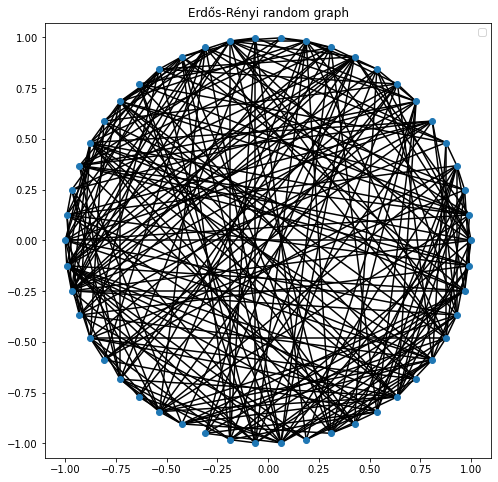

In [9]:
from matplotlib import pyplot as plt

n = 50
p = 0.2

A_ER, x_ER, y_ER = erdos_renyi_rg(n, p)

plt.figure(figsize=(8, 8))

for i in range(n):
    for j in range(i + 1, n):
        if A_ER[i, j] > 0:
            plt.plot([x_ER[i], x_ER[j]], [y_ER[i], y_ER[j]], '-', 
                     color='k')
plt.plot(x_ER, y_ER, '.', markersize=12)
plt.legend()
plt.title('Erdős-Rényi random graph')
plt.axis('equal')
plt.show()

### Distribution of the nodes degrees in an Erdős-Rényi random graph

Theory:

$$
           P(k) = \left(\begin{array}{c}n-1 \\ k \end{array}\right) \, p^k (1-p)^{n-1-k}, 
$$

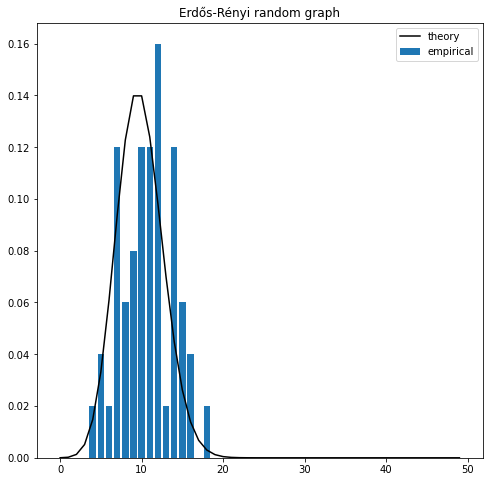

In [10]:
import scipy.special

bins_edges = np.arange(n + 1) - 0.5
bins = np.arange(n)

K = nodes_degree(A_ER)

counting = np.histogram(K, bins=bins_edges)

K_distribution = counting[0] / np.sum(counting[0])

K_distr_theory = np.zeros(n)
for k in range(n):
    K_distr_theory[k] = scipy.special.binom(n - 1, k) * (
        p ** k * (1 - p) ** (n - 1 - k))

plt.figure(figsize=(8, 8))

plt.bar(range(n), K_distribution, label='empirical')
plt.plot(range(n), K_distr_theory, '-', color='k', label='theory')
plt.legend()
plt.title('Erdős-Rényi random graph')
plt.show()

## Watts-Strogatz small-world model

Symmetric and binary graph with parameters $n$, $c$, and $p$.

$n$ : number of nodes, placed in a circle.

$c$ : number of connected nearest neigbours. Must be even.

$p$ : probability that an existing connection is rewired.



### Simulation of a Watts-Strogatz small-world model


In [11]:
def watts_strogatz_sw(n, c, p):
    """
    Function generating a Watts-Strogatz small-world model
    
    Parameters
    ==========
    n : Number of nodes.
    c : Number of connected nearest neigbours. Must be even.
    p : Probability that each existing edge is randomly rewired.
    """
    
    A = np.zeros([n, n])    
    P = np.random.rand(n, n)    
    A_rewired = np.zeros([n, n])    
    
    c_half = int(c / 2)
    
    for i in range(n):
        for j in range(i + 1, i + 1 + c_half):
            A[i, j % n] = 1
            A[j % n, i] = 1

            
    for i in range(n):
        for j in range(i + 1, i + 1 + c_half):
            if P[i, j % n] < p:
                # Select a random node.
                k = (np.random.randint(n - 1) + 1) + i
                A_rewired[i, k % n] = 1
                A_rewired[k % n, i] = 1
            else:
                A_rewired[i, j % n] = 1
                A_rewired[j % n, i] = 1

    # This below is for plotting in a circular arrangement.
    x = np.cos(np.arange(n) / n * 2 * np.pi)
    y = np.sin(np.arange(n) / n * 2 * np.pi) 
    
    return A_rewired, x, y


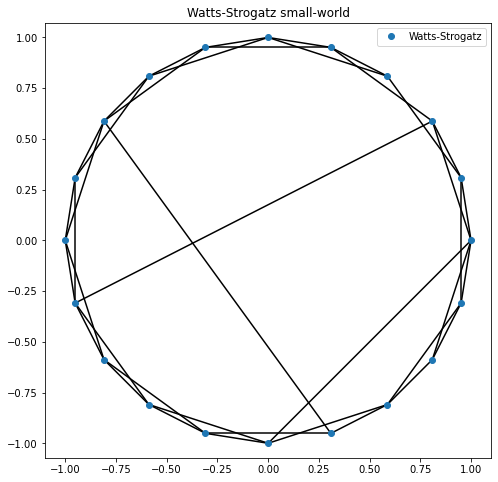

In [12]:
from matplotlib import pyplot as plt

n = 20
c = 4  # c must be even.
p = 0.1

A_WS, x_WS, y_WS = watts_strogatz_sw(n, c, p)

plt.figure(figsize=(8, 8))

for i in range(n):
    for j in range(i + 1, n):
        if A_WS[i, j] > 0:
            plt.plot([x_WS[i], x_WS[j]], [y_WS[i], y_WS[j]], '-', 
                     color='k')
plt.plot(x_WS, y_WS, '.', markersize=12, label='Watts-Strogatz')
      
plt.legend()
plt.title('Watts-Strogatz small-world')
plt.axis('equal')
plt.show()

## Albert-Barabási preferential-growth model

Symmetric and binary graph with parameters $n$, $c$, and $p$.

$m$ : connections of the added node.

$n_0$ : initial number of fully connected nodes. $n_0 > m$

Each turn we add a node.

The connection probability to an existing node is proportional to the degree of that node.



### Simulation of an Albert-Barabási preferential-growth model


In [14]:
def albert_barabasi_pg(n0, m, n):
    """
    Function generating an Albert-Barabási preferential-growth model
    
    Parameters
    ==========
    n0 : Initial number of nodes.
    m : Number of connections
    n : Final number of nodes.
    """
    
    A = np.zeros([n, n]) 
    A[0:n0, 0:n0] = 1  # Fully connect the initial nodes.
    for i in range(n0):
        A[i, i] = 0
    
    for i in range(n - n0):
        K = nodes_degree(A[0:n0 + i, 0:n0 + i])
        D = K / np.sum(K)
        new_connections = np.random.choice(
            np.arange(n0 + i), m ,replace=False, p=D)
        for j in new_connections:
            A[n0 + i, j] = 1
            A[j, n0 + i] = 1
        
    # This below is for plotting in a circular arrangement.
    x = np.cos(np.arange(n) / n * 2 * np.pi)
    y = np.sin(np.arange(n) / n * 2 * np.pi) 
    
    return A, x, y


No handles with labels found to put in legend.


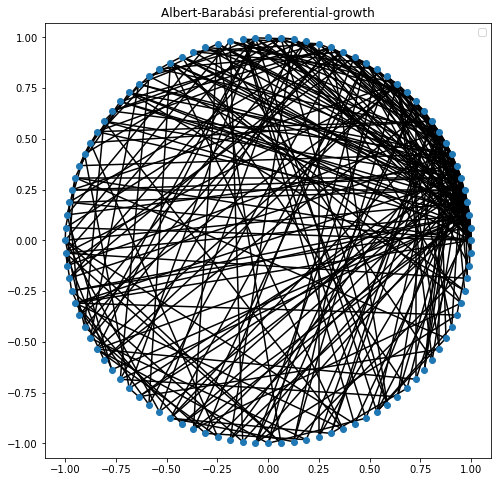

In [15]:
from matplotlib import pyplot as plt

n0 = 5
m = 3  # Must be < n0
n = 100

A_AB, x_AB, y_AB = albert_barabasi_pg(n0, m, n)

plt.figure(figsize=(8, 8))

for i in range(n):
    for j in range(i + 1, n):
        if A_AB[i, j] > 0:
            plt.plot([x_AB[i], x_AB[j]], [y_AB[i], y_AB[j]], '-', 
                     color='k')
plt.plot(x_AB, y_AB, '.', markersize=12)
plt.legend()
plt.title('Albert-Barabási preferential-growth')
plt.axis('equal')
plt.show()

### Inverse cumulative nodes degrees distribution in an Albert-Barabási preferential-growth model

Theory: power law 

$$
           C(k) = \frac{m^2}{k^2}
$$

In [16]:
def complementary_CDF(f):
    """
    Function to return the complementary cumulative distribution function.
    
    Parameters
    ==========
    f : Sequence of node degrees (as they occur, non necessarily sorted).
    """
    
    num_nodes = len(f)
    s = np.sort(np.array(f))  # Sort f in ascending order.
    c = np.array(np.arange(num_nodes, 0, -1)) / (num_nodes)  # Descending.
    
    c_CDF = c 

    return c_CDF, s

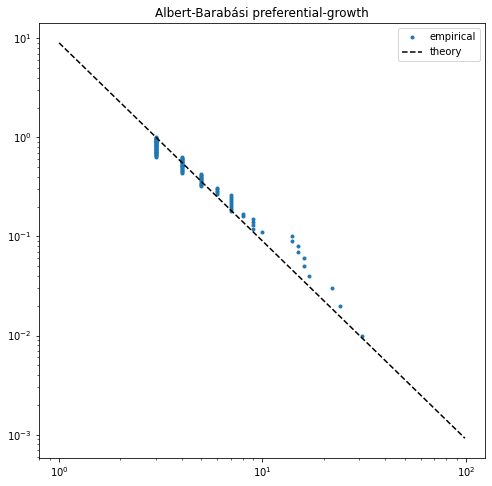

In [17]:
import scipy.special

K = nodes_degree(A_AB)
c_CDF, s = complementary_CDF(K)
c_CDF_theory = m ** 2 / np.arange(1, n) ** 2

plt.figure(figsize=(8, 8))
plt.loglog(s, c_CDF, '.', label='empirical')
plt.plot(np.arange(1, n), c_CDF_theory, '--', color='k', label='theory')
plt.legend()
plt.title('Albert-Barabási preferential-growth')
plt.show()

## Average path and clustering coefficient

Let's check the case of the Watts-Strogatz small-world model.



### Average parth length Watts-Strogatz small-world model

We will plot the average path length as a function of the  probability of rewiring $p$.

Theory:

- limit for $p = 0$: $L_{\rm av} \approx n / 2 c$
- limit for $p = 1$: $L_{\rm av} \approx \log{n} / \log{c}$


In [18]:
n = 100
c = 6  # c must be even.
p_list = np.array([1e-5, 2e-5, 5e-5, 
                   1e-4, 2e-4, 5e-4,
                   1e-3, 2e-3, 5e-3,
                   1e-2, 2e-2, 5e-2,
                   1e-1, 2e-1, 5e-1,
                   1])

L_av = np.zeros(np.size(p_list))

for i in range(np.size(p_list)):
    p = p_list[i]
    print(f'iteration {i}: p={p}')
    A_WS, x_WS, y_WS = watts_strogatz_sw(n, c, p)
    L = matrix_path_length(A_WS)
    for j in range(n):
        L_av[i] += np.sum(L[j, j + 1:n])
    L_av[i] /= (n * (n - 1) / 2)
    # print(f'L_av[{i}]={L_av[i]}')
       

iteration 0: p=1e-05
iteration 1: p=2e-05
iteration 2: p=5e-05
iteration 3: p=0.0001
iteration 4: p=0.0002
iteration 5: p=0.0005
iteration 6: p=0.001
iteration 7: p=0.002
iteration 8: p=0.005
iteration 9: p=0.01
iteration 10: p=0.02
iteration 11: p=0.05
iteration 12: p=0.1
iteration 13: p=0.2
iteration 14: p=0.5
iteration 15: p=1.0


Plot.

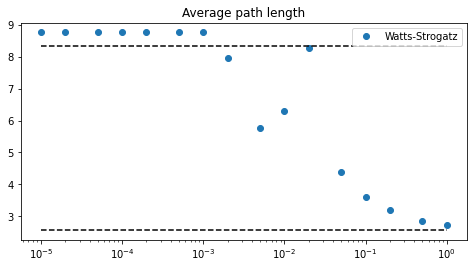

In [19]:
plt.figure(figsize=(8, 4))
plt.plot(p_list, L_av, '.', markersize=12, label='Watts-Strogatz')
plt.plot(p_list, n / 2 / c + 0 * p_list, '--', color='k')
plt.plot(p_list, np.log(n) / np.log(c) + 0 * p_list, '--', color='k')
plt.xscale('log')
plt.legend()
plt.title('Average path length')
plt.show()

### Clustering coefficient of the Watts-Strogatz small-world model

We will plot the clustering coefficient as a function of the parameter $c$.

Theory:

- limit for $p \to 0$: $C \approx 3(c - 2)/4(c - 1)$
- limit for $p \to 1$: similar to a Erdös-Rényi random graph.

In [20]:
n = 200
c_list = np.arange(2, n, 2)  # c must be even.
# p = 0.1   # This deviates from the p=0 limit.
p = 0.001  # This is close to the p=0 limit.


C = np.zeros(np.size(c_list))

for i in range(np.size(c_list)):
    c = c_list[i]
    # print(f'iteration {i}: c={c}')
    A_WS, x_WS, y_WS = watts_strogatz_sw(n, c, p)
    C[i] = clustering_coefficient(A_WS)
       

Let's plot the clustering coefficient.


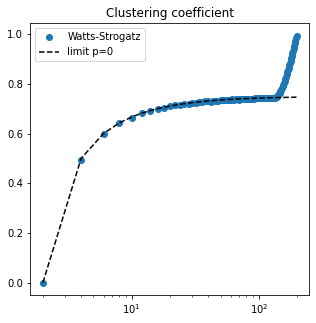

In [21]:
plt.figure(figsize=(5, 5))
plt.plot(c_list, C, '.', markersize=12, label='Watts-Strogatz')
plt.plot(c_list, 3 / 4 * (c_list - 2) / (c_list - 1), '--', color='k', 
        label='limit p=0' )
plt.xscale('log')
plt.legend()
plt.title('Clustering coefficient')
plt.show()